# Import the relevant Libraries

In [1]:
import pandas as pd
from pandas import ExcelWriter,ExcelFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import matplotlib as mpl  
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import graphviz
from sklearn.linear_model import LinearRegression

# Load The data and rename Some Columns with meaningful Names

In [2]:
# Load The data
data = pd.read_excel('Canada.xlsx',sheet_name = 2)

# Rename some columns
data.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)
data.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,Y_1980,...,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Information about the data

In [3]:
data['DevName'].unique()

array(['Developing regions', 'Developed regions', 'World'], dtype=object)

In [4]:
data = data[data['DevName']!='World']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       195 non-null    object
 1   Coverage   195 non-null    object
 2   Country    195 non-null    object
 3   AREA       195 non-null    int64 
 4   Continent  195 non-null    object
 5   REG        195 non-null    int64 
 6   Region     195 non-null    object
 7   DEV        195 non-null    int64 
 8   DevName    195 non-null    object
 9   Y_1980     195 non-null    int64 
 10  Y_1981     195 non-null    int64 
 11  Y_1982     195 non-null    int64 
 12  Y_1983     195 non-null    int64 
 13  Y_1984     195 non-null    int64 
 14  Y_1985     195 non-null    int64 
 15  Y_1986     195 non-null    int64 
 16  Y_1987     195 non-null    int64 
 17  Y_1988     195 non-null    int64 
 18  Y_1989     195 non-null    int64 
 19  Y_1990     195 non-null    int64 
 20  Y_1991     195 non-null    int64

In [6]:
data.isnull().sum()

Type         0
Coverage     0
Country      0
AREA         0
Continent    0
REG          0
Region       0
DEV          0
DevName      0
Y_1980       0
Y_1981       0
Y_1982       0
Y_1983       0
Y_1984       0
Y_1985       0
Y_1986       0
Y_1987       0
Y_1988       0
Y_1989       0
Y_1990       0
Y_1991       0
Y_1992       0
Y_1993       0
Y_1994       0
Y_1995       0
Y_1996       0
Y_1997       0
Y_1998       0
Y_1999       0
Y_2000       0
Y_2001       0
Y_2002       0
Y_2003       0
Y_2004       0
Y_2005       0
Y_2006       0
Y_2007       0
Y_2008       0
Y_2009       0
Y_2010       0
Y_2011       0
Y_2012       0
Y_2013       0
dtype: int64

# Data Visualization

## The histogram of total immigrants to Canada each year

In [7]:
colonne = list(data)
del(colonne[0:9])
def somme(colonne):
    somme = []
    for column in colonne:
        somme.append(data[column].sum())
    return somme

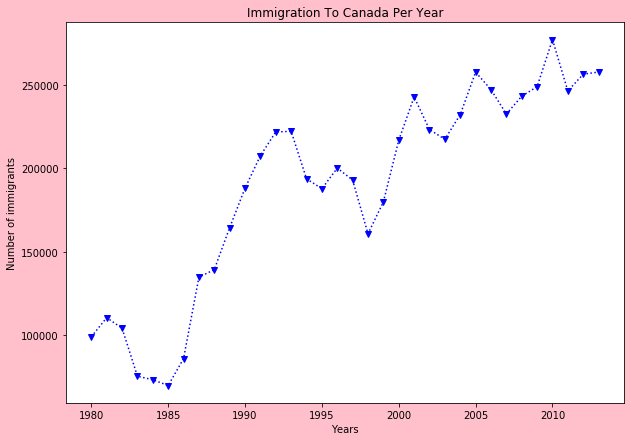

In [8]:
bins_var = [1980]
for i in range(1980,2013):
    i+=1
    bins_var.append(i)
s = somme(colonne)
#print(s.shape,bins_var)
plt.figure(figsize = (10,7),facecolor = 'pink')
plt.title('Immigration To Canada Per Year')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.plot(bins_var,s,'b:v')
plt.show()

# The progress of the number of immigrants from Tunisia

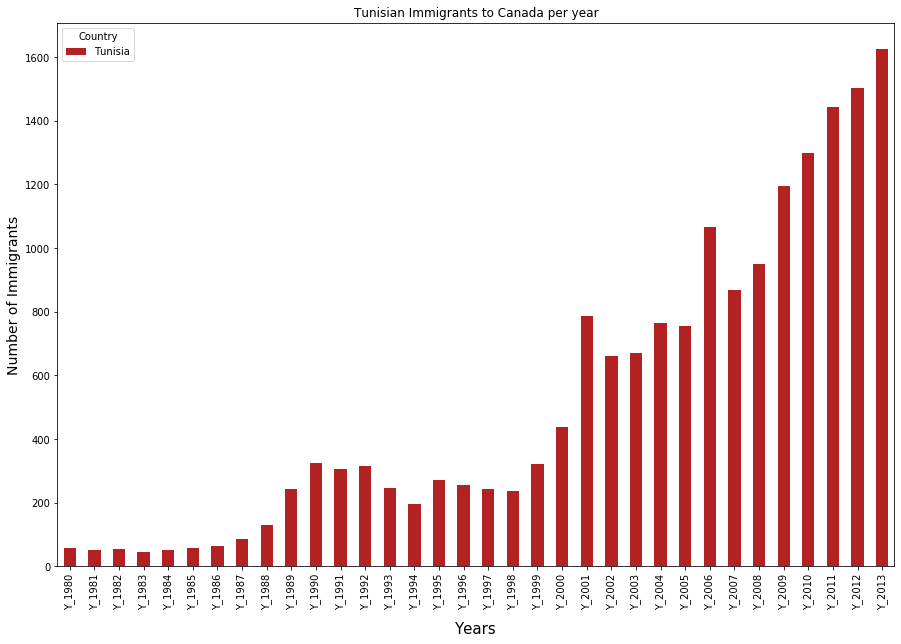

In [9]:
data_Tunisia = data[data['Country']=='Tunisia']
data_Tunisia = data_Tunisia.drop(['Type','Coverage','DevName','Continent','Region','AREA','REG','DEV'],axis = 1)
data_Tunisia = data_Tunisia.transpose()
header = data_Tunisia.iloc[0] 
data_Tunisia = data_Tunisia[1:] 
data_Tunisia.columns = header
data_Tunisia.plot.bar(figsize = (15,10),color = 'firebrick')
plt.xlabel('Years',fontsize = 15,labelpad = 12)
plt.ylabel('Number of Immigrants',fontsize = 14)
plt.title('Tunisian Immigrants to Canada per year')
plt.show()

In [10]:
data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

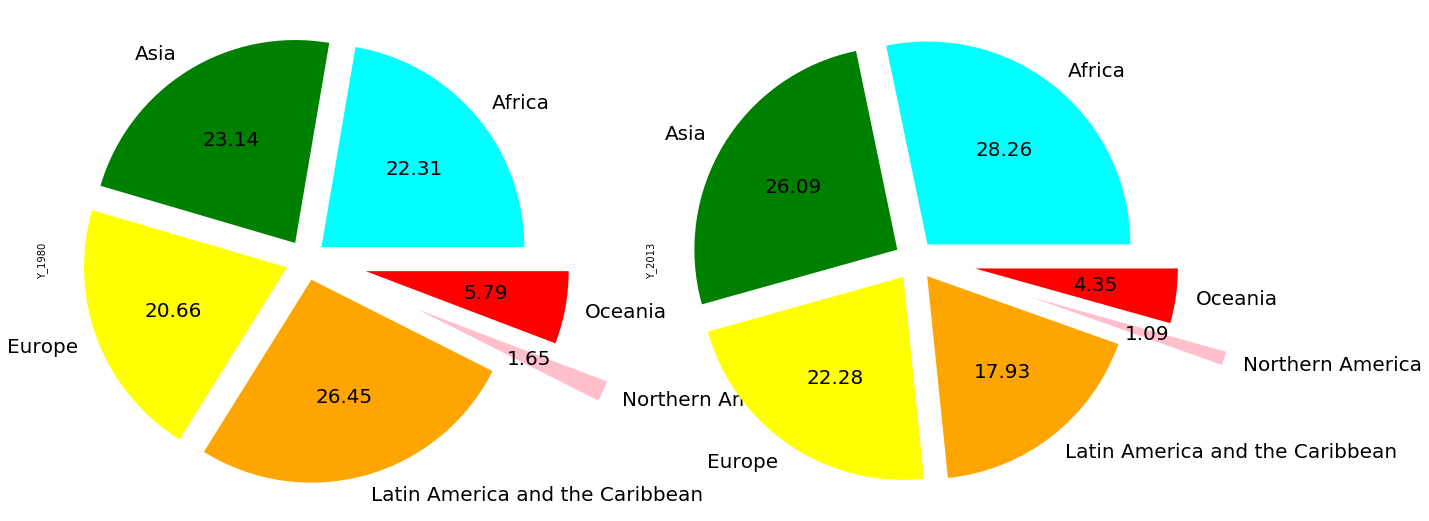

In [12]:
list_color = ['aqua','green','yellow','orange','pink','red']
list_explode = [0.1,0.1,0.1,0.1,0.6,0.3]
# Data contains the Number of immigrants in 1980
data_1980 = data[['Continent','Y_1980']]


# Data contains the Number of immigrants in 2013
data_2013 = data[['Continent','Y_2013']]


fig = plt.figure(figsize = (20,10))
plt.title('Distribution of Immigrants per Continent')
plt.xlabel('Continent')
plt.subplot(1,2,1)
data_1980.groupby('Continent')['Y_1980'].nunique().plot.pie(explode = list_explode,colors = list_color,autopct = '%.2f',fontsize = 20)

plt.subplot(1,2,2)

data_2013.groupby('Continent')['Y_2013'].nunique().plot.pie(explode = list_explode,colors = list_color,autopct = '%.2f',fontsize = 20)


In [13]:
# Create a data containing just The Northern African countries
data_North_Africa = data[data['Region']=='Northern Africa']
#data_North_Africa.groupby(['OdName']).size().unstack().plot(kind='bar',stacked=True,grid=False,figsize=(12,10))
#plt.title('Distribution of Northern African ',fontdict={'fontsize':14})
#plt.ylabel('Rating',fontdict={'fontsize':13})
#plt.show()
data_North_Africa.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,Y_1980,...,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
55,Immigrants,Foreigners,Egypt,903,Africa,912,Northern Africa,902,Developing regions,612,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165
99,Immigrants,Foreigners,Libya,903,Africa,912,Northern Africa,902,Developing regions,5,...,196,196,281,198,306,282,384,352,299,255
116,Immigrants,Foreigners,Morocco,903,Africa,912,Northern Africa,902,Developing regions,325,...,3686,2939,3322,4021,4226,5532,6242,4399,3878,3261
164,Immigrants,Foreigners,Sudan,903,Africa,912,Northern Africa,902,Developing regions,20,...,1823,1310,1039,683,622,422,612,531,444,343


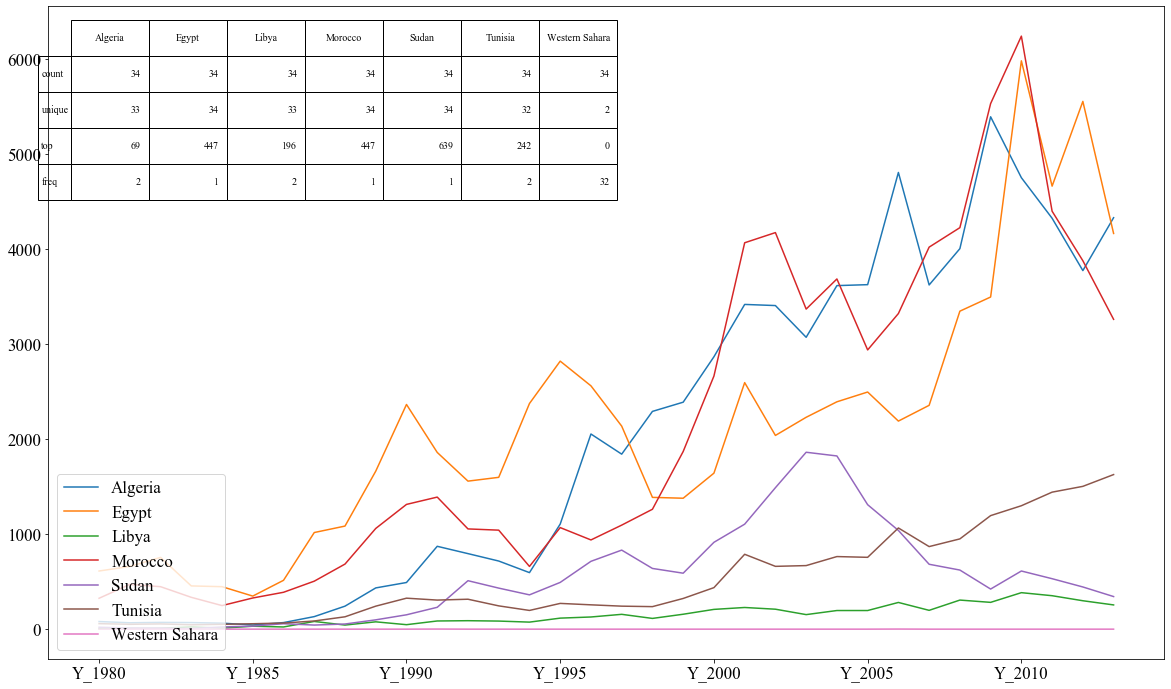

In [14]:
# Create a data contains the RegName and The Years
data_2 = data_North_Africa.drop(['Type','Coverage','AREA','Continent','Region','DEV','DevName','REG'],axis = 1)

# Transpose the dataFrame
data_tr = data_2.transpose()

# Drop the first row an replace it with the OdName
new_header = data_tr.iloc[0] 
data_tr = data_tr[1:] 
data_tr.columns = new_header
mpl.rc('font',family='Times New Roman',size = 17)
# Immigration Progress on each year with OdName
fig, ax = plt.subplots(1, 1)
# Information about the data 
table(ax, np.round(data_tr.describe(), 2),loc='upper left',colWidths = [0.07,0.07,0.07,0.07,0.07,0.07,0.07])
data_tr.plot.line(ax = ax,figsize = (20,12))
plt.legend(loc = 'lower left')


#colWidths=[0.2, 0.2, 0.2]

In [15]:
data_2.head()

,Country,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,...,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
55,Egypt,612,660,755,455,447,348,514,1017,1085,...,2393,2496,2190,2356,3347,3496,5982,4663,5555,4165
99,Libya,5,7,9,24,10,31,23,81,43,...,196,196,281,198,306,282,384,352,299,255
116,Morocco,325,471,447,335,248,328,388,505,685,...,3686,2939,3322,4021,4226,5532,6242,4399,3878,3261
164,Sudan,20,12,11,7,23,32,57,43,54,...,1823,1310,1039,683,622,422,612,531,444,343


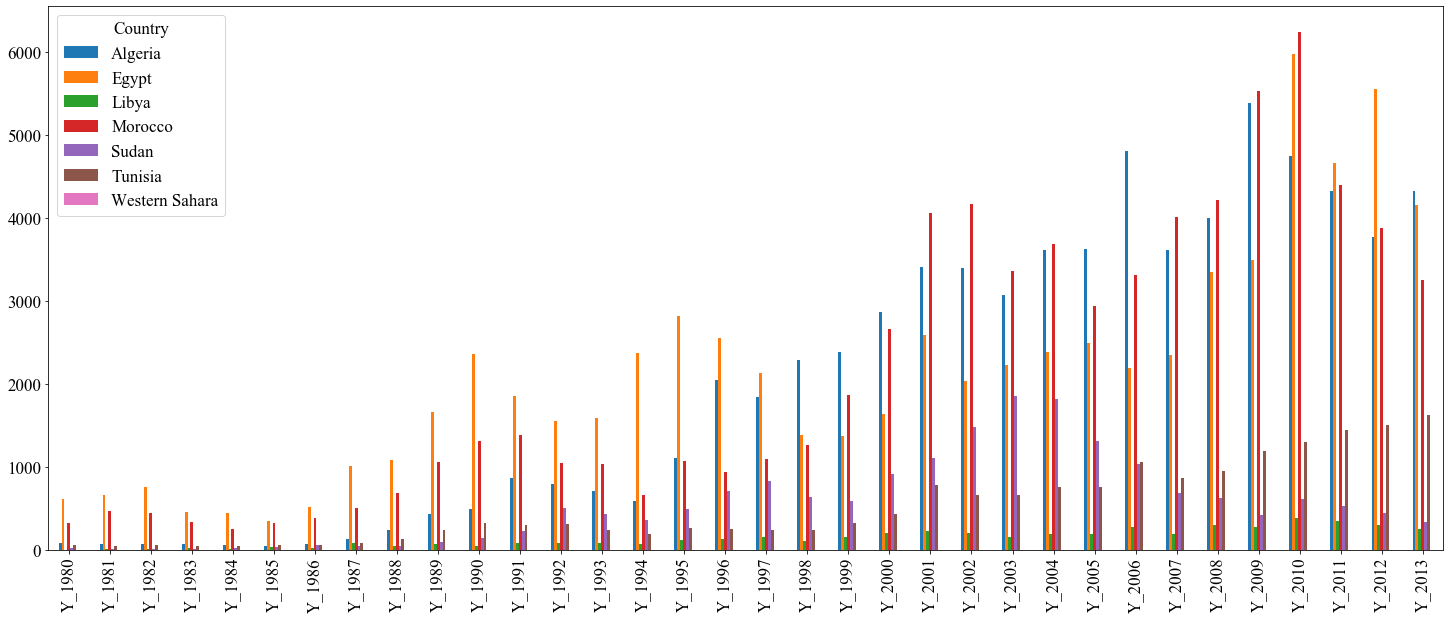

In [16]:
data_tr.plot.bar(figsize = (25,10),linewidth = 40)

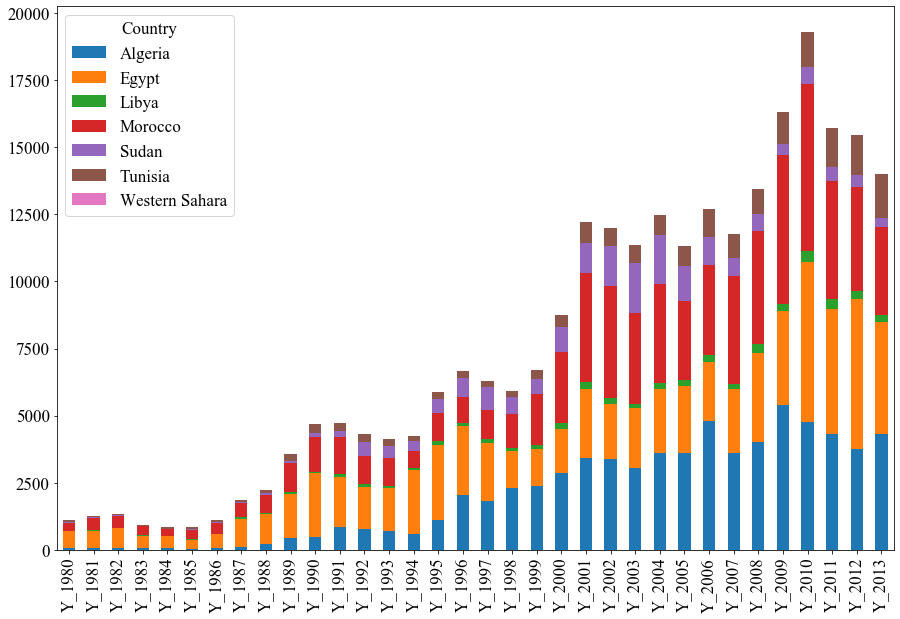

In [17]:
data_tr.plot.bar(stacked = True,figsize = (15,10))

# Selectiong the most important Features

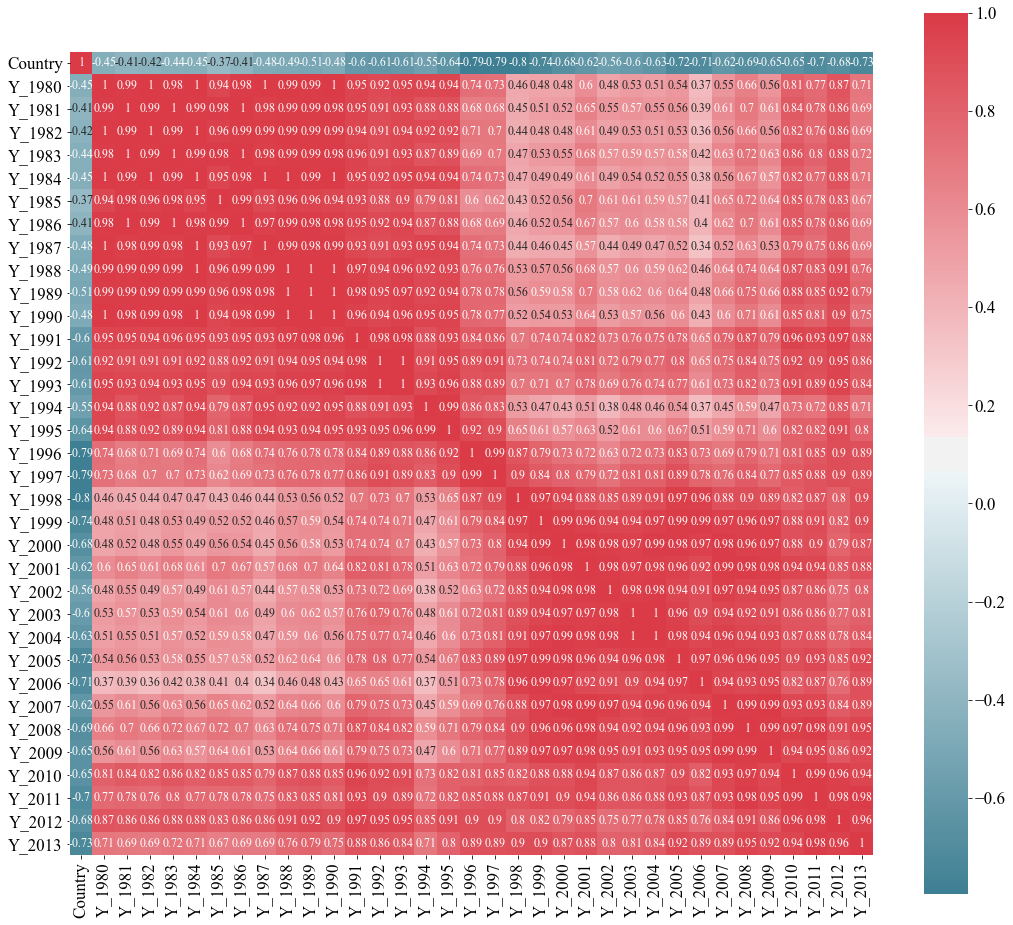

In [18]:
#data_1 = data[data['Continent','Y_1980','Y_1981','Y_1980','Y_1980','Y_1980','Y_1980','Y_1980']]
Encoder=LabelEncoder()
data_2["Country"]=Encoder.fit_transform(data_2["Country"])
def plot_correlation_map( df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 18 , 18 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( data_2)

## The Elbow Function 

In [22]:
data_agg = data.drop(['Type','Coverage','Country','Continent','Region','AREA','DEV','REG'],axis = 1)
# Encoding Contries
encoder = LabelEncoder()
data_agg['Country']=encoder.fit_transform(data['Country'])
data_agg['DevName'] = encoder.fit_transform(data['DevName'])
Sum_of_Squared_Distances = []

K = range(1,15)
for i in K:
    km = KMeans(n_clusters = i) 
    km = km.fit(data_agg)
    Sum_of_Squared_Distances.append(km.inertia_)
print(len(Sum_of_Squared_Distances))

14


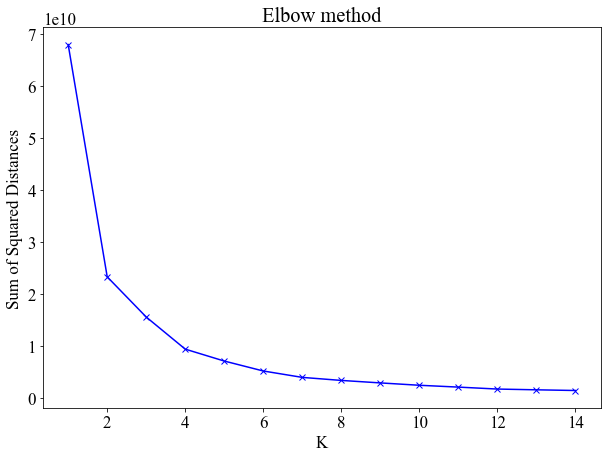

In [23]:
# Plot the Sum_of_Squared_Distances and the number of clusters K
#print(K.shape())
fig = plt.figure(figsize = (10,7))
K = range(1,15)
Sum_of_Squared_Distances = Sum_of_Squared_Distances[0:14]
plt.plot(K,Sum_of_Squared_Distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title("Elbow method")
plt.show()

# Modeling with the agglomerative method

In [24]:



model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete")
data_agg['Country'].unique()
clust_labels = model.fit_predict(data_agg)

In [25]:
agglomerative = pd.DataFrame(clust_labels)

## Plot The Agglomerative Clusters

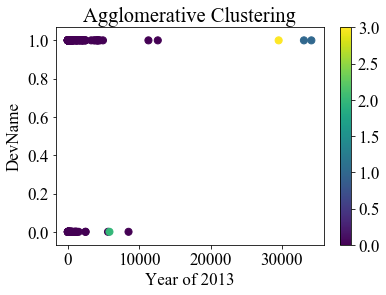

In [26]:
# Create a new figure
fig = plt.figure()
# 111 is equivalent to 1,1,1 that means 1x1 grid, 1st subplot
ax = fig.add_subplot(111)

scatter = ax.scatter(data_agg["Y_2013"],data_agg["DevName"],
                    c = agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Year of 2013')
ax.set_ylabel('DevName')
plt.colorbar(scatter)

## Dendrogram

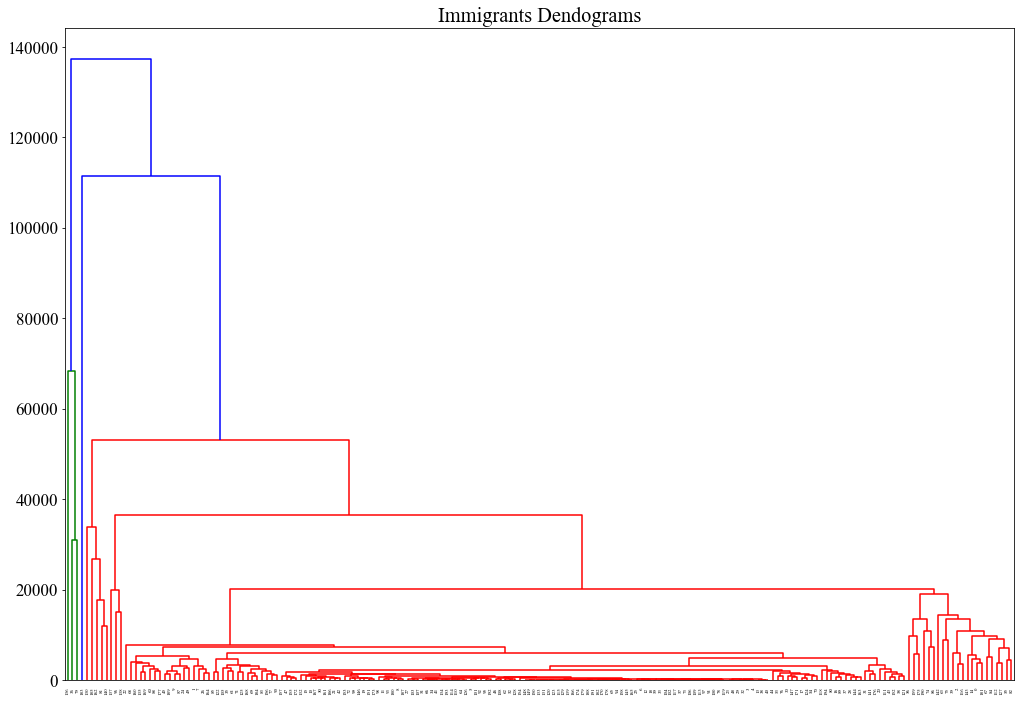

In [27]:
plt.figure(figsize = (17,12))
plt.title("Immigrants Dendograms")
dend = shc.dendrogram(shc.linkage(data_agg,method = "complete"))

In [28]:
data_reg = data.drop(['Type','Coverage','Continent','Region','AREA','DEV','REG','DevName'],axis = 1)
data_reg = data_reg.transpose()
header = data_reg.iloc[0] 
data_reg = data_reg[1:] 
data_reg.columns = header
data_reg.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
Y_1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
Y_1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
Y_1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
Y_1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
Y_1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


# Decision Tree Prediction

## Split the Data

In [29]:
Encoder=LabelEncoder()
data["Continent"]=Encoder.fit_transform(data["Continent"])
X = data[['Continent','Y_2013']]
Y = data.DevName
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=30)
data['DevName'].unique()

array(['Developing regions', 'Developed regions'], dtype=object)

## Choosing the best parameters to implement the Decision tree method

In [30]:
depth_range = range(1, 10)
leaf_range = range(1,15)
leaf_nodes = range(1,15)
param_grid = dict(max_depth=depth_range, min_samples_leaf=leaf_range)
d_tree = tree.DecisionTreeClassifier()
grid = GridSearchCV(d_tree,param_grid,cv=10, scoring='accuracy')
grid.fit(X_train,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
predictions = (d_tree.fit(X_train,Y_train).predict(X_test))
best_predictions = grid.predict(X_test)
print('Score:{}'.format(d_tree.score(X_train,Y_train)))
print(('Best_Score:{}'.format(grid.score(X_train,Y_train))))

0.9916666666666666
{'max_depth': 2, 'min_samples_leaf': 1}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Score:1.0
Best_Score:0.9914529914529915


## Decision Tree Implantation

{'max_depth': 2, 'min_samples_leaf': 1}


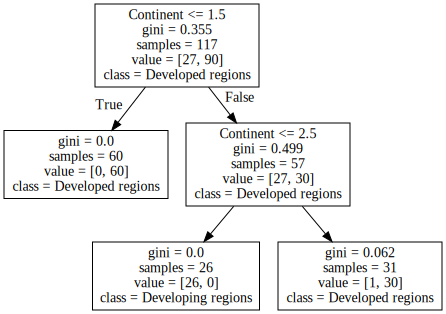

In [31]:
import graphviz
print(grid.best_params_)
d_tree_best_score = tree.DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'],
                                                min_samples_leaf = grid.best_params_['min_samples_leaf'])
d_tree_best_score = d_tree_best_score.fit(X_train,Y_train)

dot_data = tree.export_graphviz(d_tree_best_score, out_file=None,feature_names = X.columns,
                                class_names = ["Developing regions","Developed regions"])  
graph = graphviz.Source(dot_data)
graph.render("data")
graph 

# Linear Regression

## Declare the features and the target

In [32]:
X = data[['Y_2012']]
y = data['Y_2013']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.35,random_state = 365)

## Create the linear Regression

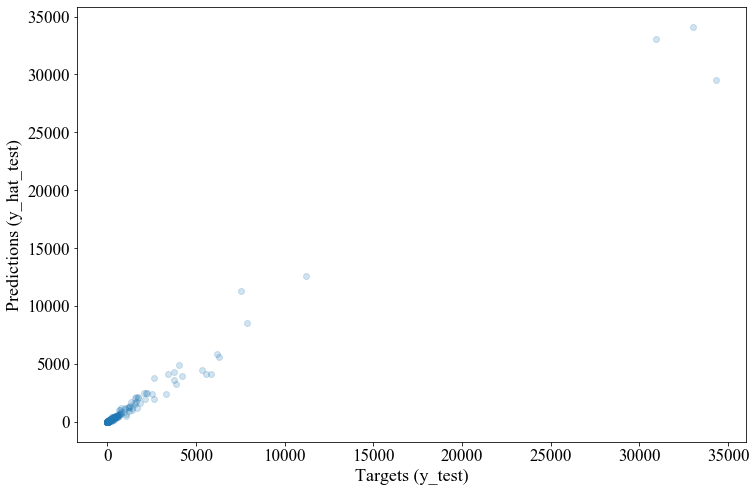

In [33]:
reg = LinearRegression()
reg.fit(x_train,y_train)
fig = plt.figure(figsize = (12,8))
plt.scatter(X, y, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()
y_hat = reg.predict(x_train)

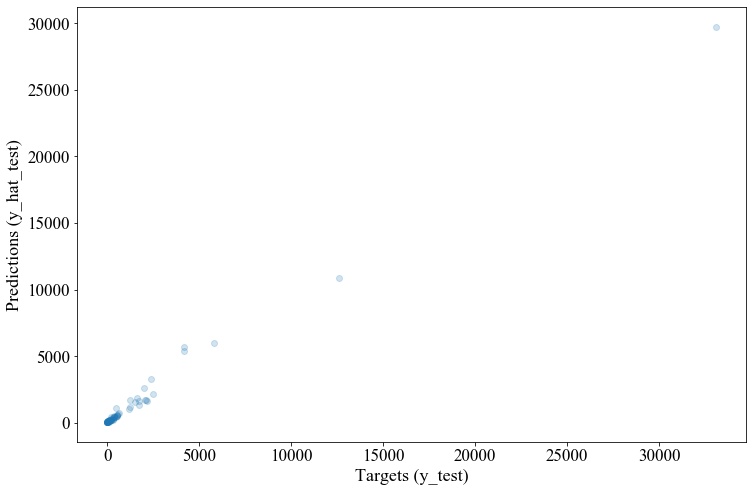

In [34]:
y_hat_test = reg.predict(x_test)
fig = plt.figure(figsize = (12,8))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [35]:
reg.score(x_train,y_train)

0.9819130666595853

In [36]:
model = reg.fit(X, y)
Y_2013 = [['Y_2013']]
#y_2014 = reg.predict(Y_2013)
#y_2014 = reg.intercept_ + reg.coef_ * Y_2013
#y_2014

# Polynomial Regression

In [38]:
Encoder=LabelEncoder()
data["Country"]=Encoder.fit_transform(data["Country"])
X2 = data[['Y_2012']]
y2 = data['Y_2013'].values
# Split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.35,random_state=40)
poly2 = PolynomialFeatures(degree = 3)
log2 = LinearRegression()
X2_train_ = poly2.fit_transform(X2_train)
log2.fit(X2_train_,y2_train)
X2_test_=poly2.fit_transform(X2_test)
pred2 = log2.predict(X2_test_)
print("MSE: ",mean_squared_error(y2_test,pred2))
print("R_squared: ",r2_score(y2_test,pred2))

MSE:  849143.6311239338
R_squared:  0.9500960419215501


# Multi Linear Regression

In [40]:
X1 = data[['Y_2010','Y_2011','Y_2012']]
y1 = data['Y_2013'].values
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.35,random_state=40)
log = LinearRegression()
log.fit(X1_train,y1_train)
pred = log.predict(X1_test)
print("MSE : ",mean_squared_error(y1_test,pred))
print("R_squared: ",r2_score(y1_test,pred))

MSE :  1065270.0795000016
R_squared:  0.9373943447950843
